In [2]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib.pyplot import imread
import  matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
st=pd.read_csv("stop.txt",error_bad_lines=False)
st

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [4]:
st = [a.strip() for a in st.a] 
st = [a for a in st if a] 
st[0:10]  

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [5]:
nlp =spacy.load('en_core_web_sm')

In [7]:
one_block = st[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

C:\python\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [8]:
one_block

'again'

In [9]:
for token in doc_block[0:20]:
    print(token, token.pos_) 

again ADV


# Emotion mining

In [22]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [23]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [24]:
st=pd.read_csv("stop.txt",error_bad_lines=False)
st

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [25]:
st= [a.strip() for a in st.a] 
st = [a for a in st if a] 

In [28]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(st))
sentences 

["a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example

In [29]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,a's able about above according accordingly acr...


In [30]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [31]:
#calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [32]:
calculate_sentiment(text = 'amazing') 

4

In [33]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [34]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    570
Name: word_count, dtype: int64

In [35]:
sent_df

,sentence,sentiment_value,word_count
0,a's able about above according accordingly acr...,28,570


In [36]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
0,a's able about above according accordingly acr...,28,570


In [37]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count     1.0
mean     28.0
std       NaN
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: sentiment_value, dtype: float64

In [38]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count


In [39]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
0,a's able about above according accordingly acr...,28,570


In [40]:
sent_df['index']=range(0,len(sent_df)) 

C:\python\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


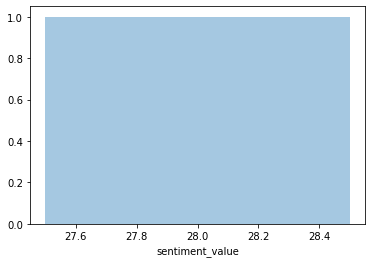

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

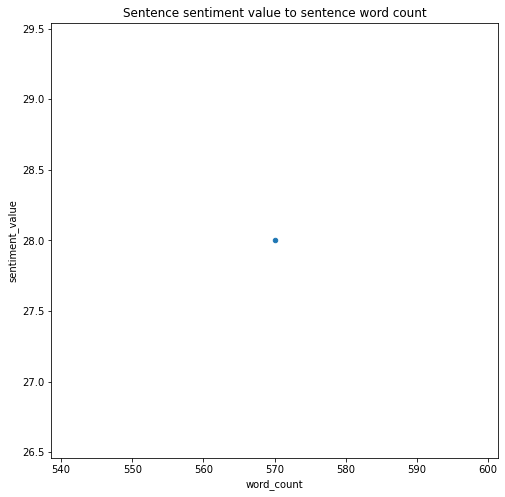

In [43]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [44]:
#Joining the list into one string
text = ' '.join(st)
text

"a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example 

In [45]:
#Punctuation
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'as able about above according accordingly across actually after afterwards again against aint all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are arent around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c cmon cs came can cant cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldnt course currently d definitely described despite did didnt different do does doesnt doing dont done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly example except f f

In [46]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['as', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'aint', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'arent', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at']


In [47]:
len(text_tokens)

571

In [48]:
#Remove stopwords
import nltk 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words ]
print(no_stop_tokens[0:40])

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'arent', 'around', 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#normalize
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['able', 'according', 'accordingly', 'across', 'actually', 'afterwards', 'aint', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'arent', 'around', 'aside', 'ask', 'asking', 'associated', 'available', 'away', 'awfully', 'b', 'became', 'become', 'becomes', 'becoming', 'beforehand', 'behind', 'believe', 'beside', 'besides', 'best', 'better', 'beyond', 'brief', 'c', 'cmon', 'cs', 'came', 'cant', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'couldnt', 'course', 'currently', 'definitely', 'described', 'despite', 'didnt', 'different', 'doesnt', 'dont', 'done', 'downwards', 'e', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhe

In [50]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['abl', 'accord', 'accordingli', 'across', 'actual', 'afterward', 'aint', 'allow', 'allow', 'almost', 'alon', 'along', 'alreadi', 'also', 'although', 'alway', 'among', 'amongst', 'anoth', 'anybodi', 'anyhow', 'anyon', 'anyth', 'anyway', 'anyway', 'anywher', 'apart', 'appear', 'appreci', 'appropri', 'arent', 'around', 'asid', 'ask', 'ask', 'associ', 'avail', 'away', 'aw', 'b', 'becam', 'becom', 'becom', 'becom', 'beforehand', 'behind', 'believ', 'besid', 'besid', 'best', 'better', 'beyond', 'brief', 'c', 'cmon', 'cs', 'came', 'cant', 'cant', 'caus', 'caus', 'certain', 'certainli', 'chang', 'clearli', 'co', 'com', 'come', 'come', 'concern', 'consequ', 'consid', 'consid', 'contain', 'contain', 'contain', 'correspond', 'could', 'couldnt', 'cours', 'current', 'definit', 'describ', 'despit', 'didnt', 'differ', 'doesnt', 'dont', 'done', 'downward', 'e', 'edu', 'eg', 'eight', 'either', 'els', 'elsewher', 'enough', 'entir', 'especi', 'et', 'etc', 'even', 'ever', 'everi', 'everybodi', 'everyon',

In [51]:
nlp = spacy.load('en_core_web_sm')

In [52]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:60])

able according accordingly across actually afterwards aint allow allows almost alone along already also although always among amongst another anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate arent around aside ask asking associated available away awfully b became become becomes becoming beforehand behind believe beside besides best better beyond brief c cmon cs came ca


In [53]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['able', 'accord', 'accordingly', 'across', 'actually', 'afterwards', 'be', 'not', 'allow', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'another', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway']


Feature Extraction

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [55]:
print(vectorizer.vocabulary_)

{'able': 0, 'accord': 1, 'accordingly': 2, 'across': 3, 'actually': 4, 'afterwards': 5, 'be': 34, 'not': 180, 'allow': 6, 'almost': 7, 'alone': 8, 'along': 9, 'already': 10, 'also': 11, 'although': 12, 'always': 13, 'among': 14, 'amongst': 15, 'another': 16, 'anybody': 17, 'anyhow': 18, 'anyone': 19, 'anything': 20, 'anyway': 21, 'anywhere': 22, 'apart': 23, 'appear': 24, 'appreciate': 25, 'appropriate': 26, 'around': 27, 'aside': 28, 'ask': 29, 'associate': 30, 'available': 31, 'away': 32, 'awfully': 33, 'become': 35, 'beforehand': 36, 'behind': 37, 'believe': 38, 'beside': 39, 'besides': 40, 'good': 104, 'well': 304, 'beyond': 41, 'brief': 42, 'cmon': 49, 'cs': 60, 'come': 52, 'can': 43, 'cause': 44, 'certain': 45, 'certainly': 46, 'change': 47, 'clearly': 48, 'co': 50, 'com': 51, 'concern': 53, 'consequently': 54, 'consider': 55, 'contain': 56, 'corresponding': 57, 'could': 58, 'course': 59, 'currently': 61, 'definitely': 62, 'describe': 63, 'despite': 64, 'do': 66, 'different': 65,

In [56]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100]) 

['co', 'com', 'come', 'concern', 'consequently', 'consider', 'contain', 'corresponding', 'could', 'course', 'cs', 'currently', 'definitely', 'describe', 'despite', 'different', 'do', 'downwards', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'fifth', 'first', 'five', 'follow', 'following', 'former', 'formerly', 'forth', 'four']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [57]:
print(X.toarray().shape) 

(476, 332)


Bigrams and Trigrams

In [60]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(st) 

In [61]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['able', 'can', 'he', 'here', 'it', 'let', 'll', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'que', 'quite', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', 'shouldn', 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'that', 'there', 'they', 've', 'we', 'what', 'where', 'who', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(st)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'ain', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'aren', 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', 'couldn', 'course',

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

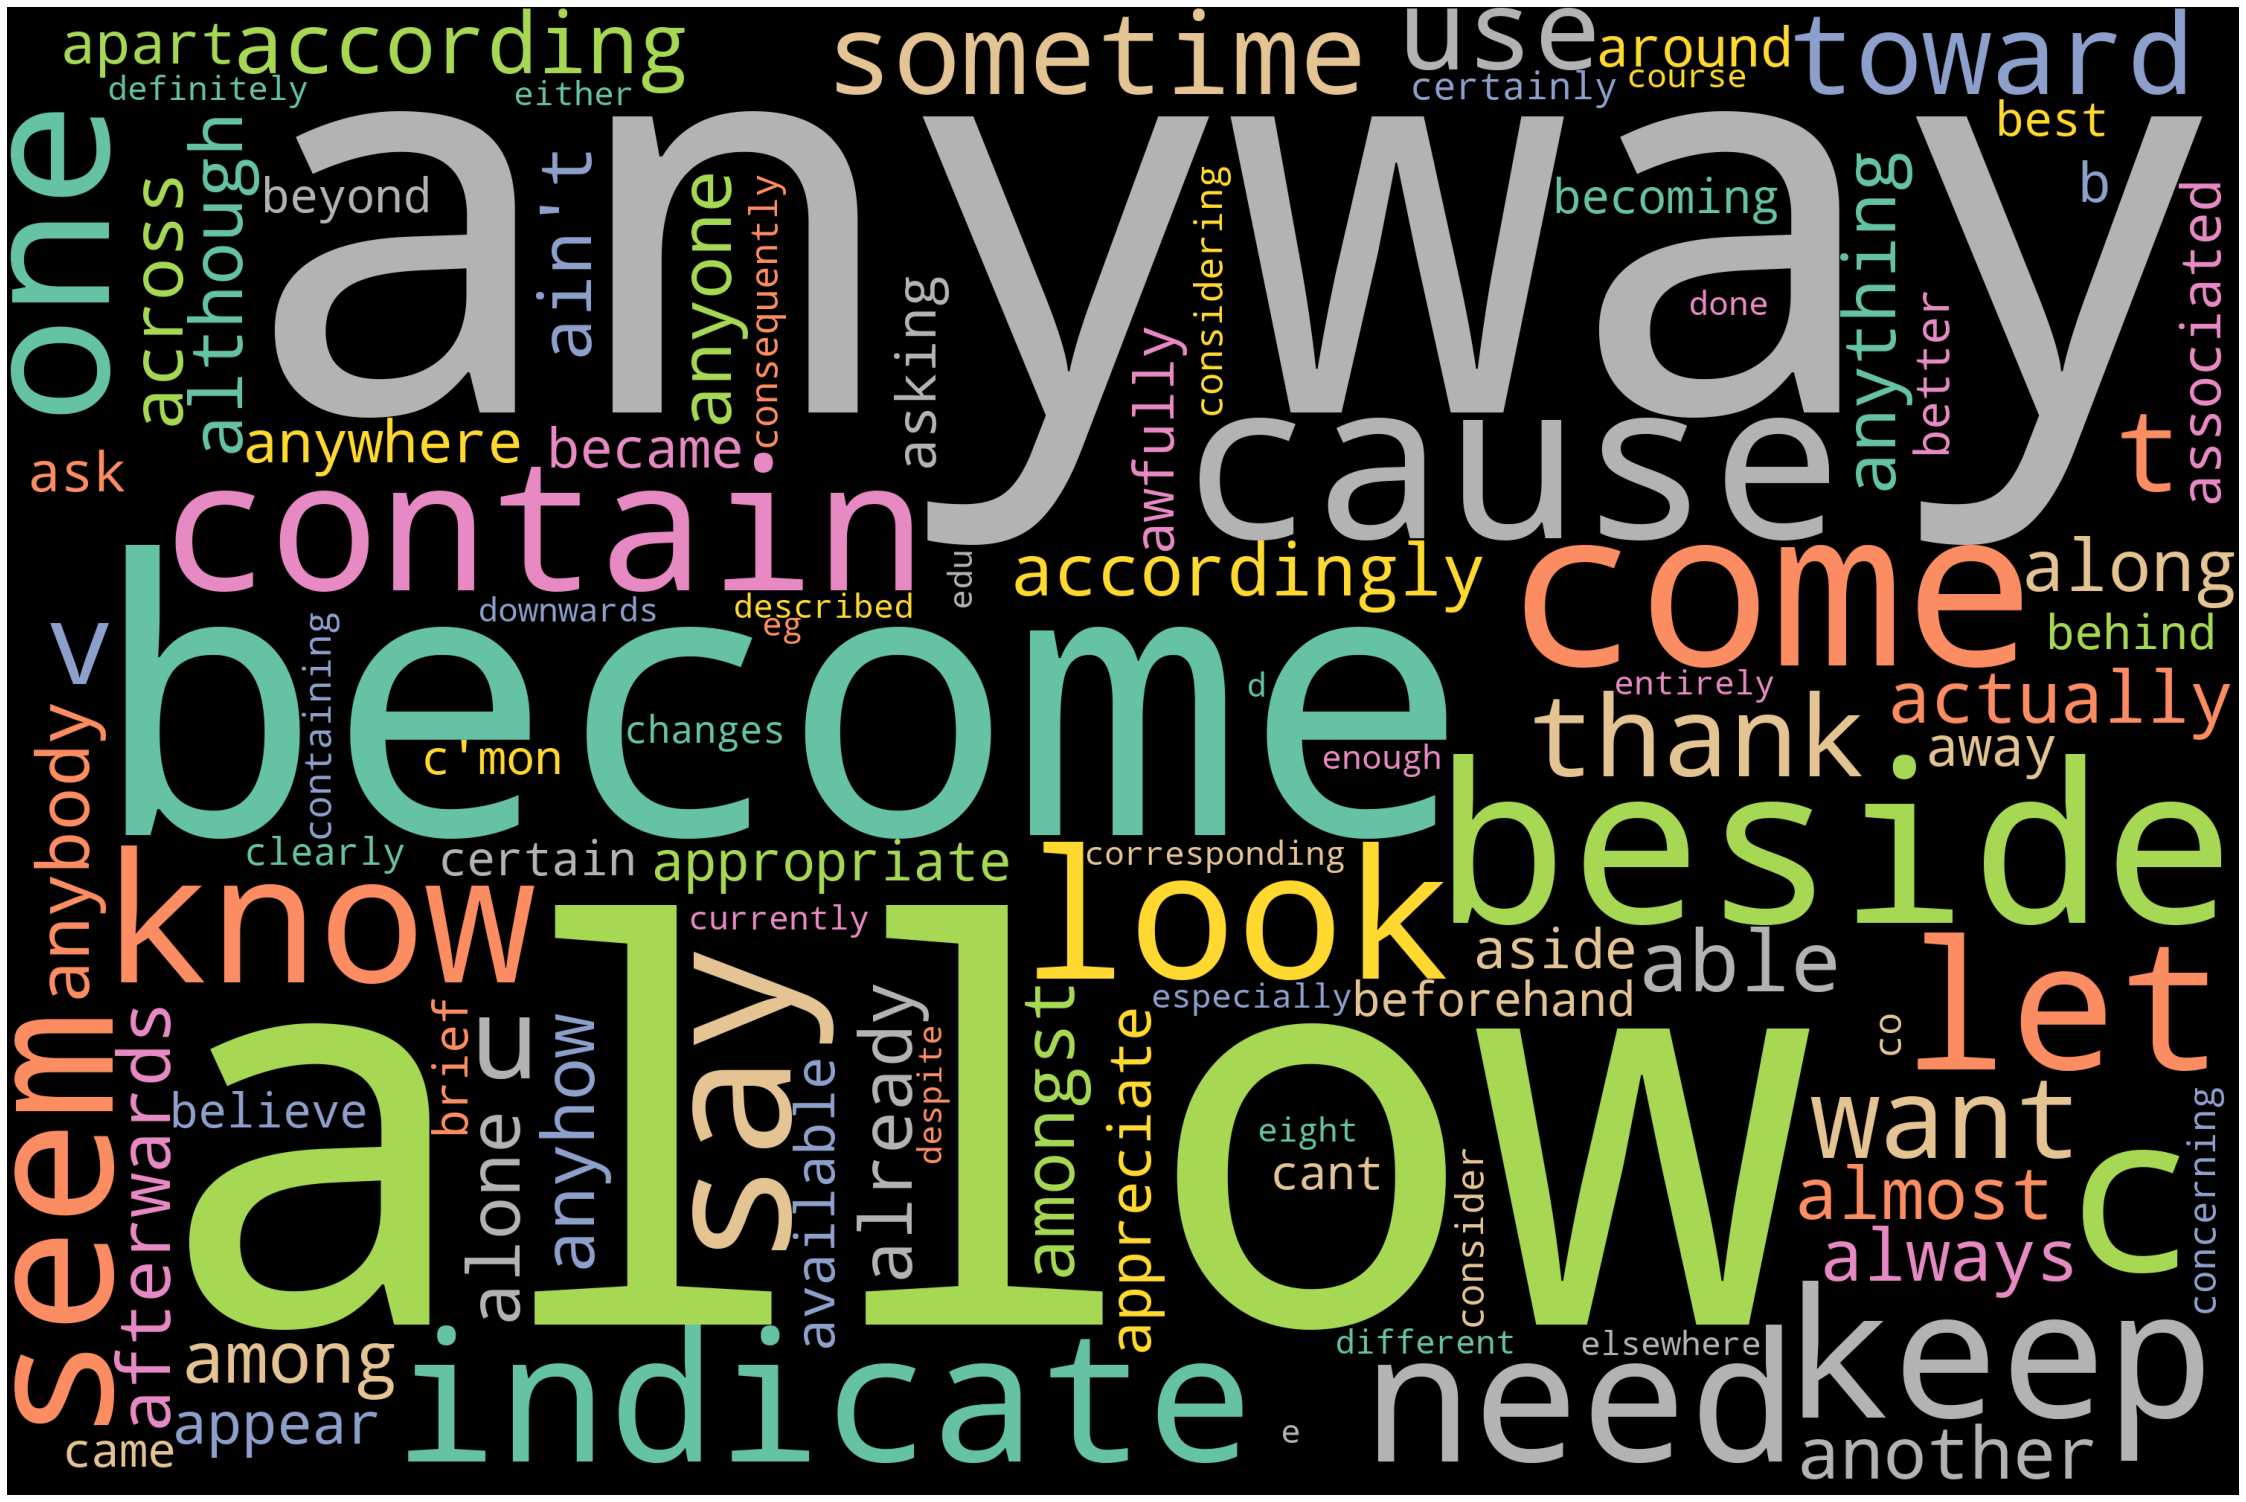

In [64]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)